<a href="https://colab.research.google.com/github/AdamayB/Tensorflow_Zero_to_Mastery/blob/main/01_Regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network using TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Create data

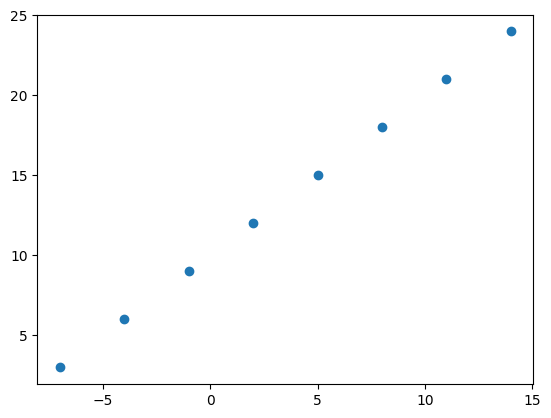

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7,-4,-1,2,5,8,11,14])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]);

# Visualize
plt.scatter(X,y);

# Input and Output shape

In [3]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [4]:
# Turn NumPy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creating a model
2. Compiling model- define loss function and optimizer and evaluation matrix
3. Fitting the model



In [5]:
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 592ms/step - loss: 11.7893 - mae: 11.7893
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 11.6568 - mae: 11.6568
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.5243 - mae: 11.5243
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3918 - mae: 11.3918
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2593 - mae: 11.2593


In [6]:
# Trying to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 116ms/step


array([[11.334346]], dtype=float32)

In [7]:
y_pred=model.predict([99.0])

1/1 [==============================] - 0s 41ms/step


In [8]:
y_pred

array([[65.764725]], dtype=float32)

In [9]:
y_pred+7.9409

array([[73.70563]], dtype=float32)

## Improving model
Improving by altering steps while creating model

1. **Creating Model:** Increase number of dense layers and change activation method
2. **Compiling Model:** change optimization function and change learning rate of the optimization function
3. **Fitting Model:**Increase number of epochs or provide more data


In [10]:
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 12.7031 - mae: 12.7031
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5706 - mae: 12.5706
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4381 - mae: 12.4381
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3056 - mae: 12.3056
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1731 - mae: 12.1731
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0406 - mae: 12.0406
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9081 - mae: 11.9081
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7756 - mae: 11.7756
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6431 - mae: 11.6431
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5106 - mae: 11.5106
Epoch 11/100
1/1 [==============================]

In [11]:
y_pred=model.predict([9.0])
y_pred

1/1 [==============================] - 0s 68ms/step


array([[16.134224]], dtype=float32)

In [12]:
# Making more adjustments
# adding extra layer
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 457ms/step - loss: 12.7183 - mae: 12.7183
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1261 - mae: 12.1261
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5235 - mae: 11.5235
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9091 - mae: 10.9091
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2855 - mae: 10.2855
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6318 - mae: 9.6318
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9440 - mae: 8.9440
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2228 - mae: 8.2228
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4612 - mae: 7.4612
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.6487 - mae: 6.6487
Epoch 11/100
1/1 [==============================] - 0s 11ms/s

In [13]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 167ms/step


array([[32.399807]], dtype=float32)

## Common ways to improve a deep model(Go Step By Step):
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change Learning rate(Most important hyperparamter to change)
* Fitting on more data
* Fittin longer

In [14]:
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 831ms/step - loss: 12.9838 - mae: 12.9838
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 12.8775 - mae: 12.8775
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 12.7712 - mae: 12.7712
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6649 - mae: 12.6649
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5586 - mae: 12.5586
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4523 - mae: 12.4523
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 12.3460 - mae: 12.3460
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2396 - mae: 12.2396
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1333 - mae: 12.1333
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0268 - mae: 12.0268
Epoch 11/100
1/1 [==============================

In [15]:
y_pred=model.predict([11.])
y_pred

1/1 [==============================] - 0s 75ms/step


array([[20.153978]], dtype=float32)

## Evaluating Model

Typical workflow when building a neural network

`Build a model -> fit it-> evaluate it ->tweak the model-> fit it-> evaluate it ->tweak the model-> fit it-> evaluate it ->tweak the model....`


When evaluating a model, there are 3 words that one must know:
>"Visualize, Visualize and Visualize"

It is a good idea to visualize:
* The data- what data are we working with? What does it look like?
* The model itself- what does our model look like?
* The training of model- how does a model perform while it learns?
* The predictions of the model- how do the predictions of the model line up/ how correct are the predictions?


In [16]:
# Making bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

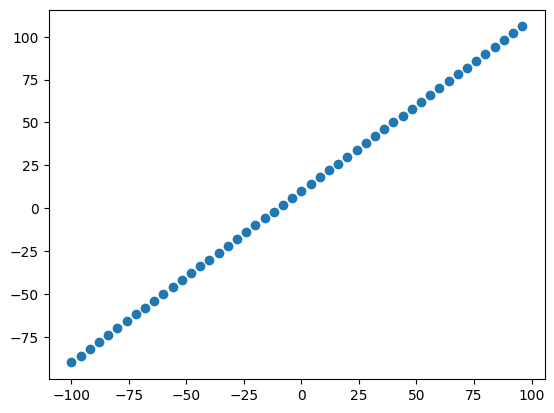

In [18]:
# Visualize data
plt.scatter(X,y)

## The 3 sets...
* Training Set
* Validation Set
* Test Set

In [19]:
# Length of Samples
len(X)

50

In [20]:
# Split data
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Visualise training and testing data

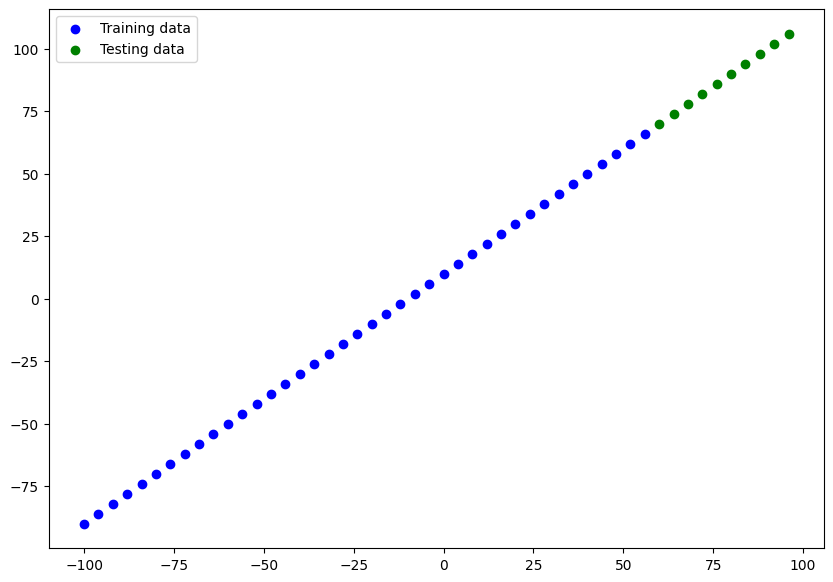

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [22]:
# Building Neural network

#1. Create a model
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),#Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
#model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs=100)

In [23]:
# Create a model which builds automatically by defining the input_shape argument
#1. Create a model
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),#Adam(lr=0.01),
              metrics=["mae"])

In [24]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params: total number of params in model.
* Trainable params: params(patterns) the model can update as it trains.
* Non-trainable params: these parameters aren't updated during training (this is typical when you bring already learnt patterns or parameters from other models during **transfer learning**)

In [25]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Create a model which builds automatically by defining the input_shape argument
#1. Create a model
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name='output_layer')
],name='model_1')

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),#Adam(lr=0.001),
              metrics=["mae"])

In [28]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 29.1183 - mae: 29.1183
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 25.5352 - mae: 25.5352
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8508 - mae: 29.8508
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 13.4633 - mae: 13.4633
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 18.1243 - mae: 18.1243
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5739 - mae: 8.5739
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3954 - mae: 12.3954
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9960 - mae: 10.9960
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.0591 - mae: 39.0591
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 26.6355 - mae: 26.6355
Epoch 11/100
2/2 [==============================] - 0s 6ms/

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


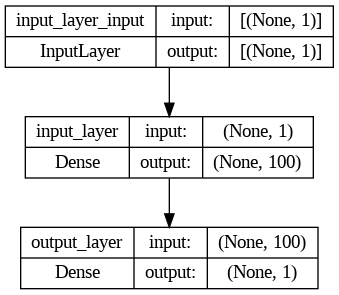

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

### Visualize model predictions.
y_test vs y_pred


In [31]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 75.88295 ],
       [ 80.82604 ],
       [ 85.76912 ],
       [ 90.712204],
       [ 95.65529 ],
       [100.598366],
       [105.54144 ],
       [110.48452 ],
       [115.42761 ],
       [120.37069 ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
# Plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  '''Plots y_test vs  y_pred'''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

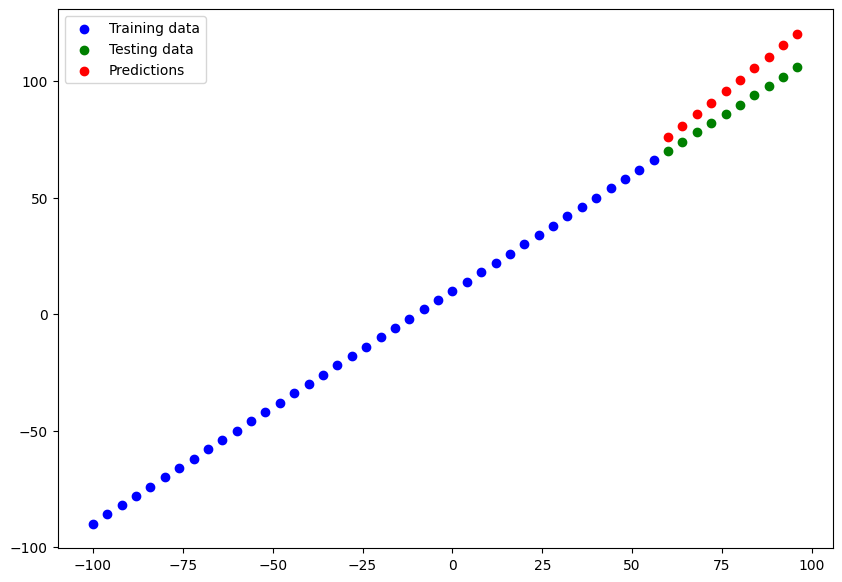

In [34]:
plot_predictions()

### Evaluating model predictions with regression evaluation matrix

Depending on the problem, we will use different evaluation matrix

Two main matrix used with regression:
* MAE- mean absolute error(great starter matrix for a regression problem)
* MSE- Mean Squared Error(When larger errors are more significant than smaller error)
* Huber-Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [35]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 164ms/step - loss: 10.1268 - mae: 10.1268


[10.126825332641602, 10.126825332641602]

In [36]:
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.67023 , 11.269583, 10.046176, 10.142441, 11.462115, 13.95902 ,
       17.633154, 22.48452 , 27.427612, 32.37069 ], dtype=float32)>

In [38]:
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.67023 , 11.269583, 10.046176, 10.142441, 11.462115, 13.95902 ,
       17.633154, 22.48452 , 27.427612, 32.37069 ], dtype=float32)>

In [39]:
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.126823>

In [41]:
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=109.89012>